<div style="text-align: center;">
    <h1> <font style="bold"> Trabajo Práctico Final </font></h1>
    <h2><font style="bold">Especialización en Inteligencia Artificial</font></h2>
    <h2><font style="bold">Probabilidad y Estadistica</font></h2>
    <h3><font style="bold">Abril Noguera - Carlos Rodríguez - José Roberto Castro Delgado</font></h3>
</div>

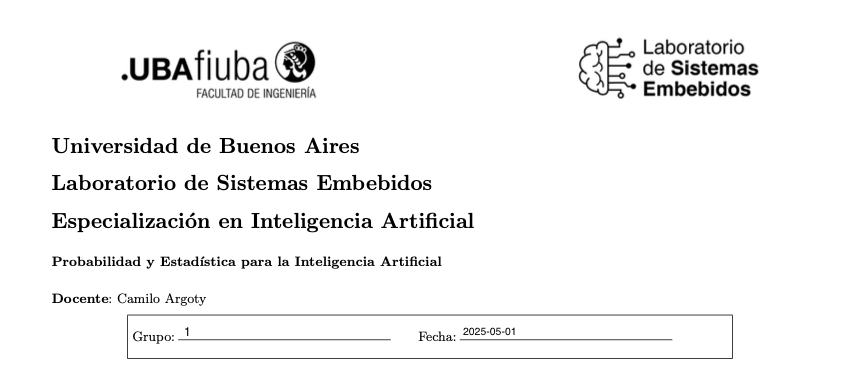

In [25]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
# Cargamos las dos hojas como DataFrames
df_santa_ana = pd.read_excel('Datos.xlsx', sheet_name='Santa Ana')
df_santa_ana['Tienda'] = 'Santa Ana'
df_la_floresta = pd.read_excel('Datos.xlsx', sheet_name='La Floresta')
df_la_floresta['Tienda'] = 'La Floresta'

df = pd.concat([df_santa_ana, df_la_floresta], ignore_index=True)

In [7]:
# Procesamiento de la variable 'Fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'])

df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.weekday
df['DiaSemana'] = df['Fecha'].dt.dayofweek
dias = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['DiaNombre'] = df['DiaSemana'].map(dias)

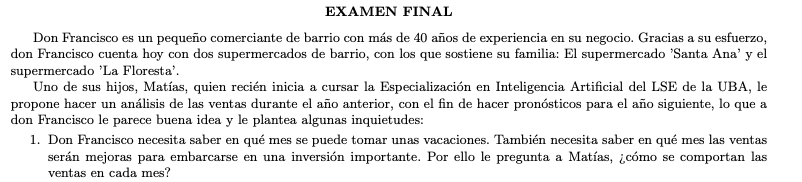

In [8]:
# Agrupamos por Mes y Tienda, sumando ventas
tabla_ventas = df.groupby(['Mes', 'Tienda'])['Ventas'].sum().unstack()

# Agregamos la columna 'Total' sumando Santa Ana + La Floresta
tabla_ventas['Total'] = tabla_ventas.sum(axis=1)

# Mostramos la tabla final
print(tabla_ventas)

Tienda  La Floresta  Santa Ana      Total
Mes                                      
1         564909.44  531254.37 1096163.81
2         555204.34  537654.75 1092859.09
3         716058.88  669986.03 1386044.91
4         629416.39  599332.09 1228748.47
5         657326.06  656018.80 1313344.86
6         697688.75  672495.24 1370184.00
7         693765.39  641277.32 1335042.71
8         734056.19  704267.47 1438323.66
9         707686.65  671577.42 1379264.07
10        723666.50  675875.98 1399542.48
11        684028.85  669108.98 1353137.84
12        662742.55  609789.19 1272531.74


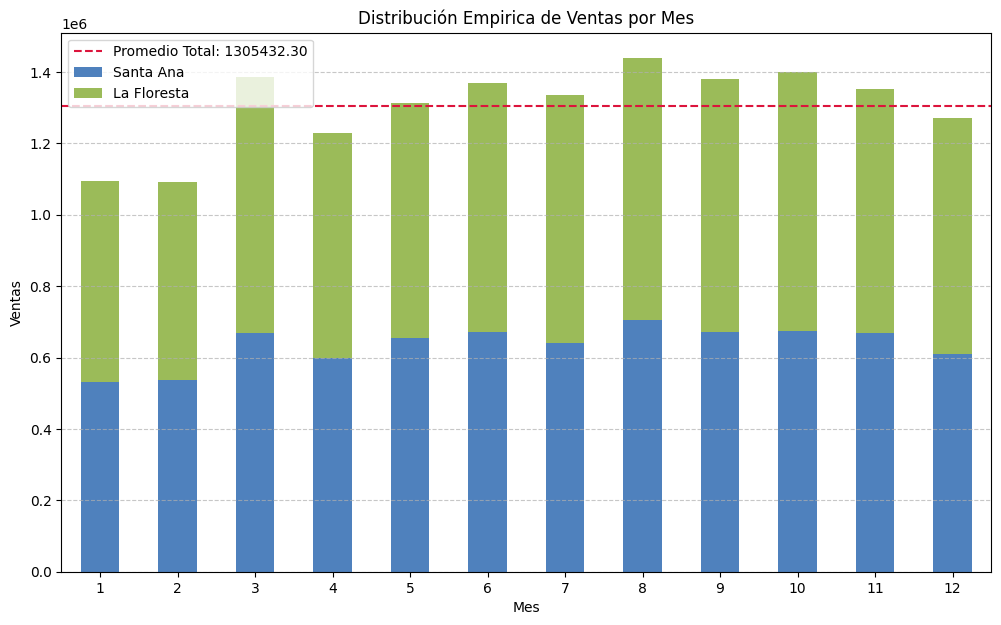

In [9]:
# Graficamos la tabla de ventas
colores = ['#4F81BD', '#9BBB59']

tabla_ventas[['Santa Ana', 'La Floresta']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colores
)

# Agregamos la línea de promedio
promedio_total = tabla_ventas['Total'].mean()
plt.axhline(y=promedio_total, color='crimson', linestyle='--', label=f'Promedio Total: {promedio_total:.2f}')

# Mejoramos el gráfico
plt.title("Distribución Empirica de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos
plt.show()

A partir del análisis de las ventas mensuales, se observó que los **meses de menores ventas** fueron **enero** y **febrero**, con ventas totales aproximadas de **1.096.164 dólares** y **1.092.859 dólares** respectivamente, valores muy similares y claramente por debajo del promedio anual de **1.305.432 dólares**.

Por otro lado, se identificaron dos momentos de **ventas máximas**: el primero en **marzo**, con aproximadamente **1.386.045 dólares** en ventas, y el segundo, aún más elevado, en **agosto**, alcanzando un total de **1.438.324 dólares**.

En base a estos resultados, se recomienda a Don Francisco considerar **enero o febrero** como los meses más adecuados para tomar vacaciones, dado que representan los períodos de menor actividad comercial. Asimismo, **marzo** y especialmente **agosto** surgen como los momentos más convenientes para **realizar inversiones importantes**, coincidiendo con los meses de mayores ingresos.

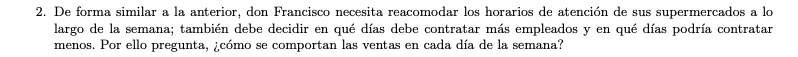

In [10]:
# Agrupamos ventas por tienda y día de la semana
ventas_por_dia_tienda = df.groupby(['DiaNombre', 'Tienda'])['Ventas'].sum().unstack()

# Ordenamos los días correctamente
ventas_por_dia_tienda = ventas_por_dia_tienda.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Agregamos la columna 'Total' sumando Santa Ana + La Floresta
ventas_por_dia_tienda['Total'] = ventas_por_dia_tienda.sum(axis=1)

# Mostramos la tabla final
print(ventas_por_dia_tienda)

Tienda     La Floresta  Santa Ana      Total
DiaNombre                                   
Lunes       1055371.95 1016699.45 2072071.41
Martes      1194650.76 1123419.36 2318070.12
Miércoles   1245788.47 1184512.79 2430301.26
Jueves      1277271.96 1193247.66 2470519.62
Viernes     1205588.98 1128702.98 2334291.96
Sábado      1068010.34 1051578.81 2119589.15
Domingo      979867.53  940476.59 1920344.12


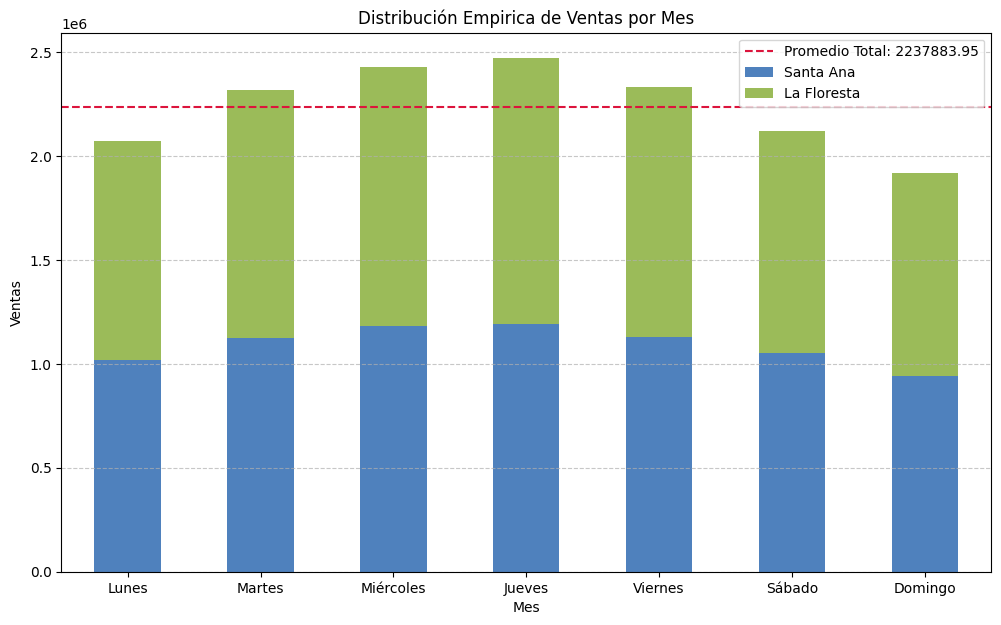

In [11]:
# Gráfico de comparación
ventas_por_dia_tienda[['Santa Ana', 'La Floresta']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colores
)

# Agregamos la línea de promedio
promedio_total = ventas_por_dia_tienda['Total'].mean()
plt.axhline(y=promedio_total, color='crimson', linestyle='--', label=f'Promedio Total: {promedio_total:.2f}')

# Mejoramos el gráfico
plt.title("Distribución Empirica de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos
plt.show()

Del análisis surge que el **miércoles** y el **jueves** son los días de **mayor volumen de ventas**, con valores superiores al promedio semanal de aproximadamente **2.237.884 dólares**. Estos días presentan una demanda más alta, por lo que se recomienda reforzar el personal para asegurar un buen nivel de atención al cliente.

En contraste, el **domingo** resulta ser el día de **menor volumen de ventas**, seguido por el **lunes** y el **sábado**. Estos días presentan valores de venta considerablemente más bajos en comparación con el resto de la semana. Por lo tanto, Don Francisco podría considerar reducir el personal durante domingos y lunes para optimizar los costos operativos.

En general, se observa que la actividad comercial se intensifica hacia mediados de semana, con un descenso hacia el fin de semana, lo que sugiere que la planificación de horarios y la asignación de recursos humanos debe estar alineada con este patrón de comportamiento.

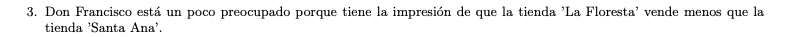

In [12]:
# Agrupamos ventas totales por Tienda
ventas_por_tienda = df.groupby('Tienda')['Ventas'].sum()

# Ventas de cada tienda
ventas_santa_ana = ventas_por_tienda['Santa Ana']
ventas_la_floresta = ventas_por_tienda['La Floresta']

# Calculamos la diferencia absoluta y relativa
diferencia = ventas_la_floresta - ventas_santa_ana
porcentaje_diferencia = (diferencia / ventas_santa_ana) * 100

print(f"Ventas Santa Ana: {ventas_santa_ana:.2f}")
print(f"Ventas La Floresta: {ventas_la_floresta:.2f}")
print(f"Diferencia absoluta: {diferencia:.2f}")
print(f"Diferencia relativa: {porcentaje_diferencia:.2f}% respecto a Santa Ana")

Ventas Santa Ana: 7638637.64
Ventas La Floresta: 8026550.00
Diferencia absoluta: 387912.36
Diferencia relativa: 5.08% respecto a Santa Ana


La impresión de Don Francisco no se confirma. Lejos de vender menos, la tienda "La Floresta" ha logrado superar las ventas de "Santa Ana" en aproximadamente un 5%. Si bien la diferencia no es extremadamente significativa, muestra que "La Floresta" se mantiene competitiva e incluso supera ligeramente a "Santa Ana" en desempeño comercial.

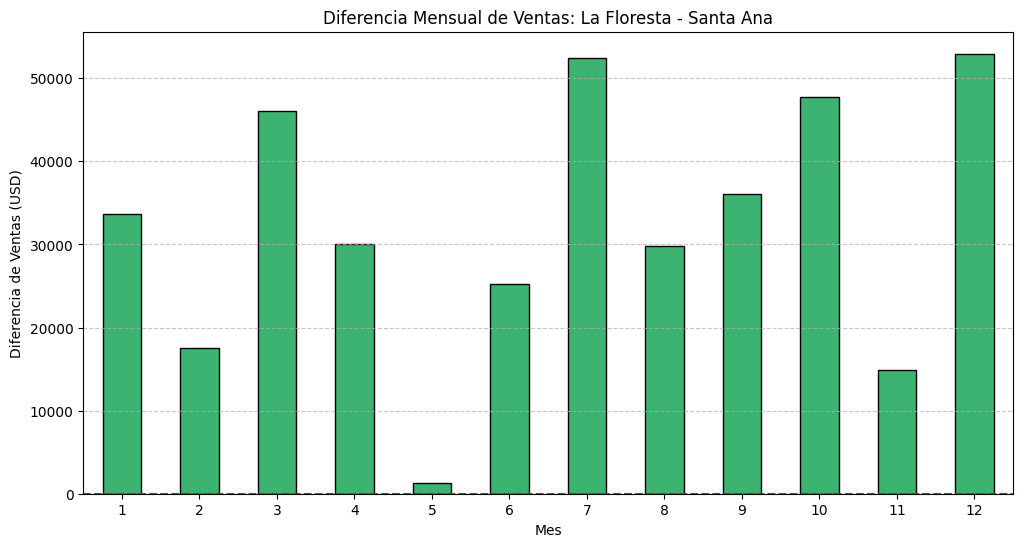

In [13]:
# Calculamos la diferencia: La Floresta - Santa Ana
diferencia_mensual = tabla_ventas['La Floresta'] - tabla_ventas['Santa Ana']

# Graficamos
plt.figure(figsize=(12,6))
diferencia_mensual.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.axhline(0, color='crimson', linestyle='--')
plt.title("Diferencia Mensual de Ventas: La Floresta - Santa Ana")
plt.xlabel("Mes")
plt.ylabel("Diferencia de Ventas (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

- **En todos los meses del año**, las diferencias son **positivas**, lo que significa que **La Floresta vendió más que Santa Ana** a lo largo de todo el período.
- La diferencia de ventas varía de mes a mes, con algunos meses mostrando una diferencia superior a **50.000 dólares**.
- En el mes de **mayo**, la diferencia es mínima pero aún favorable a La Floresta.

La percepción de Don Francisco resulta incorrecta no solo a nivel anual, sino también al observar el comportamiento mes a mes: **La Floresta ha mantenido una ventaja constante sobre Santa Ana durante todo el año**. Esta consistencia en el desempeño comercial refuerza la solidez de "La Floresta" como tienda y sugiere que las estrategias actuales están siendo efectivas.

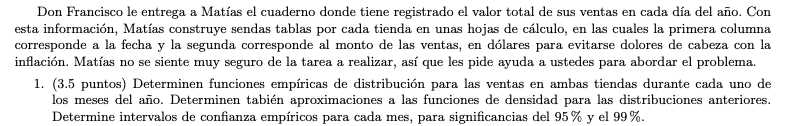

In [16]:
santa_ana_df = pd.read_excel("Datos.xlsx", sheet_name='Santa Ana')
la_floresta_df = pd.read_excel("Datos.xlsx", sheet_name='La Floresta')

In [17]:
santa_ana_df

,Fecha,Ventas
0,2023-01-01,13523.02
1,2023-01-02,14391.93
2,2023-01-03,18691.83
3,2023-01-04,21332.58
4,2023-01-05,18662.32
...,...,...
360,2023-12-27,21039.64
361,2023-12-28,18615.08
362,2023-12-29,18149.18
363,2023-12-30,18278.41


In [18]:
la_floresta_df

,Fecha,Ventas
0,2023-01-01,16755.90
1,2023-01-02,17965.69
2,2023-01-03,19928.00
3,2023-01-04,16487.99
4,2023-01-05,22374.15
...,...,...
360,2023-12-27,24157.55
361,2023-12-28,24781.98
362,2023-12-29,22517.14
363,2023-12-30,21766.36


In [19]:
santa_ana_df['Fecha'] = pd.to_datetime(santa_ana_df['Fecha'])
la_floresta_df['Fecha'] = pd.to_datetime(la_floresta_df['Fecha'])

santa_ana_df['Mes'] = santa_ana_df['Fecha'].dt.month
la_floresta_df['Mes'] = la_floresta_df['Fecha'].dt.month

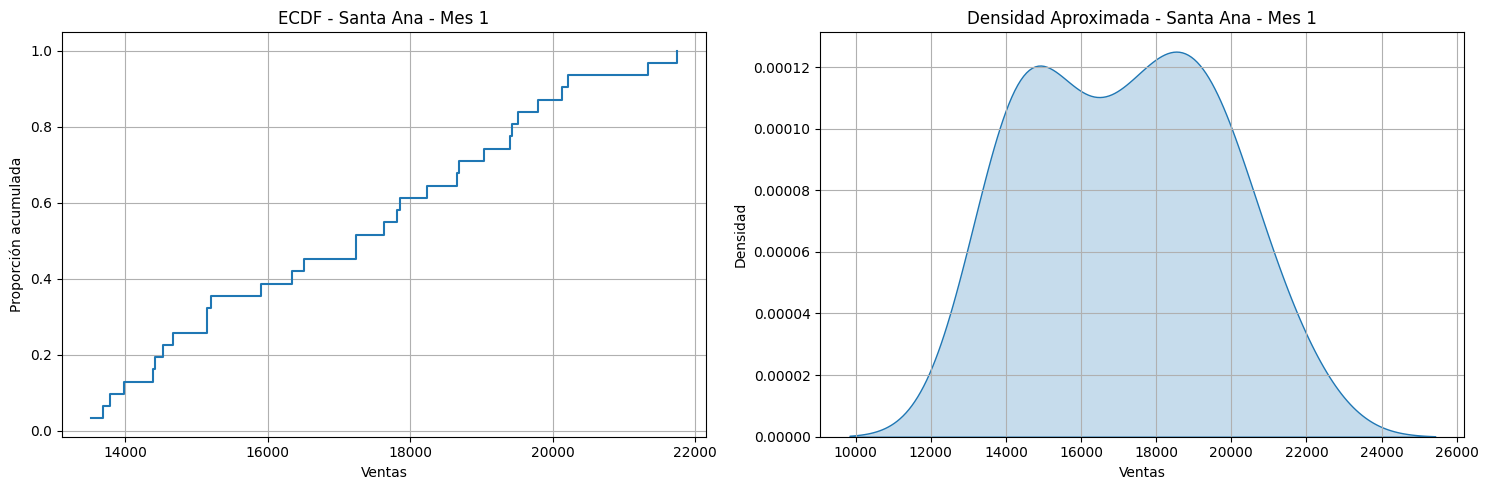

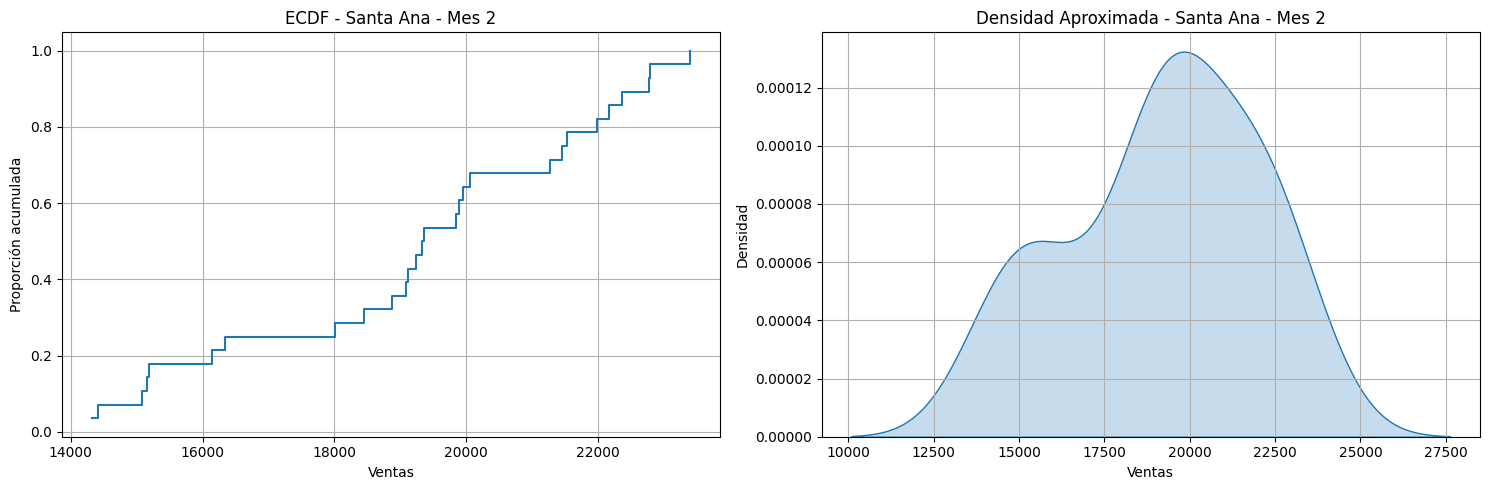

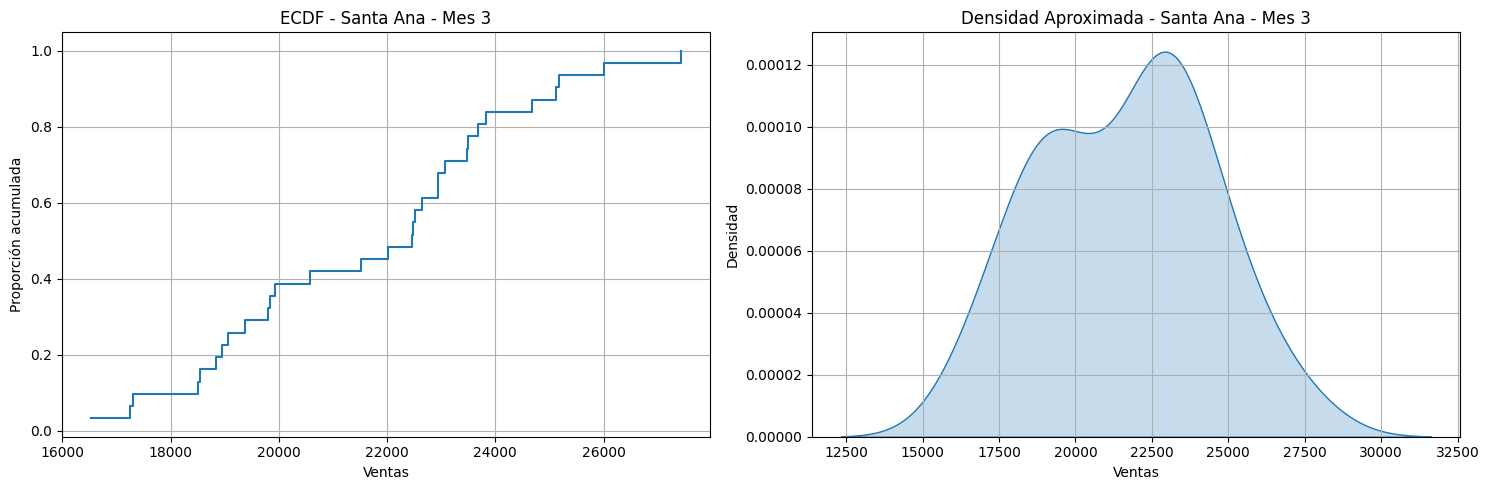

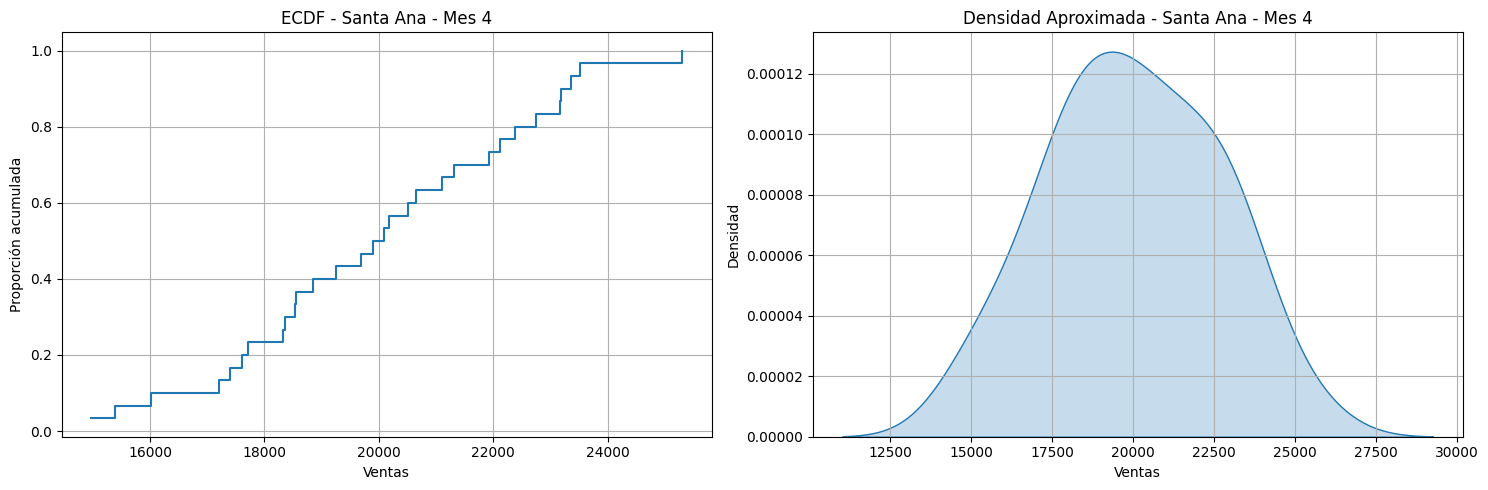

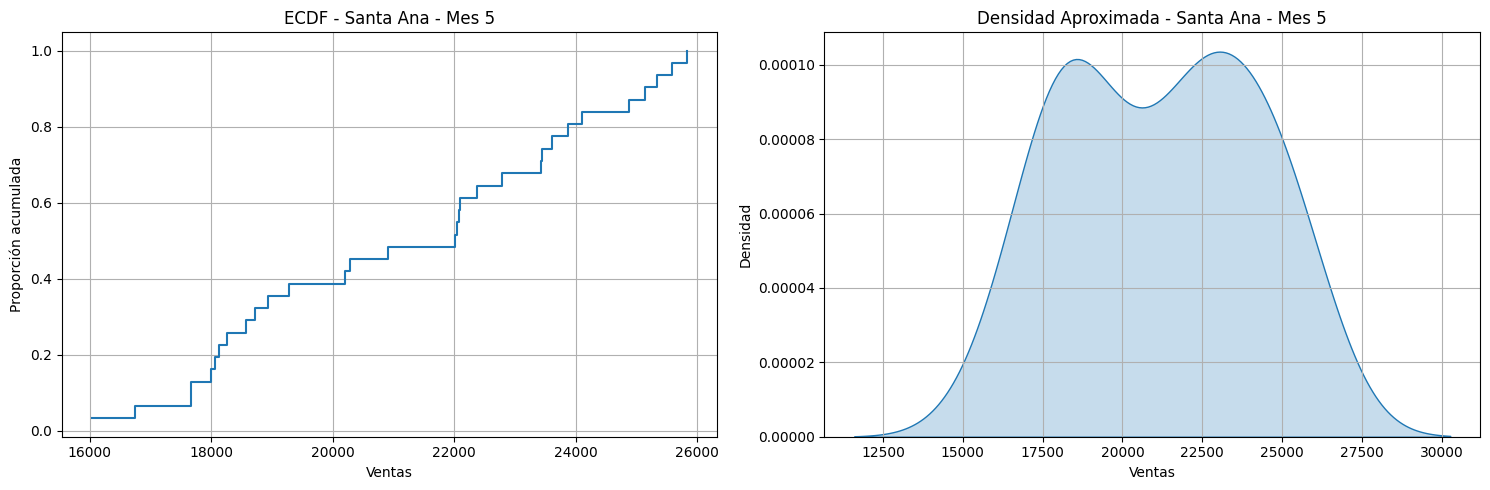

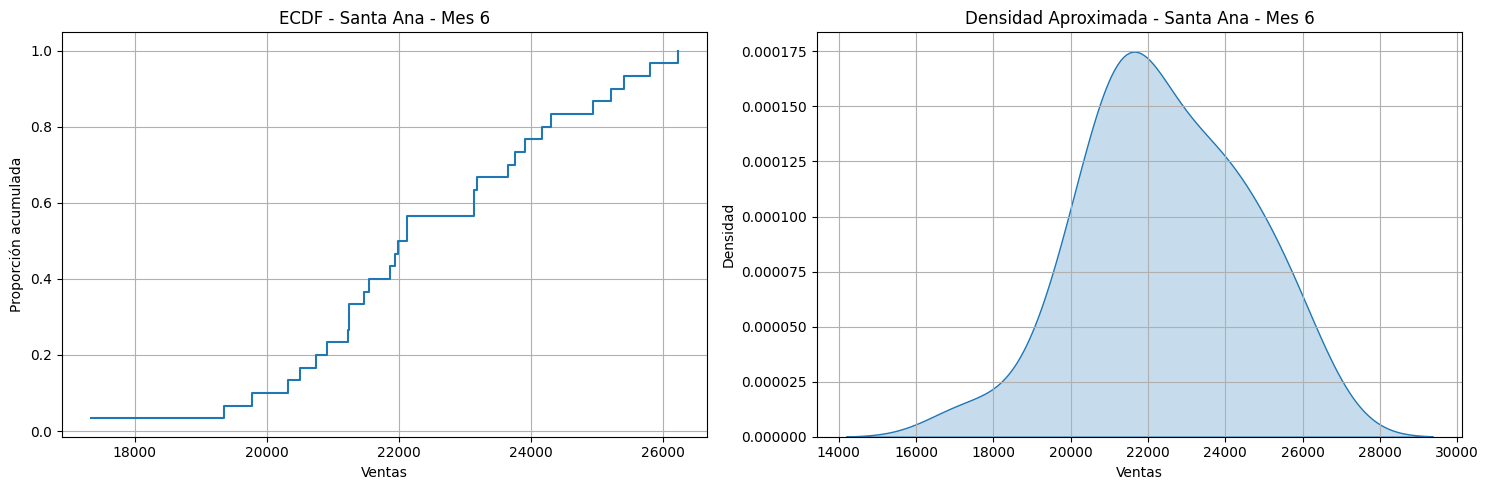

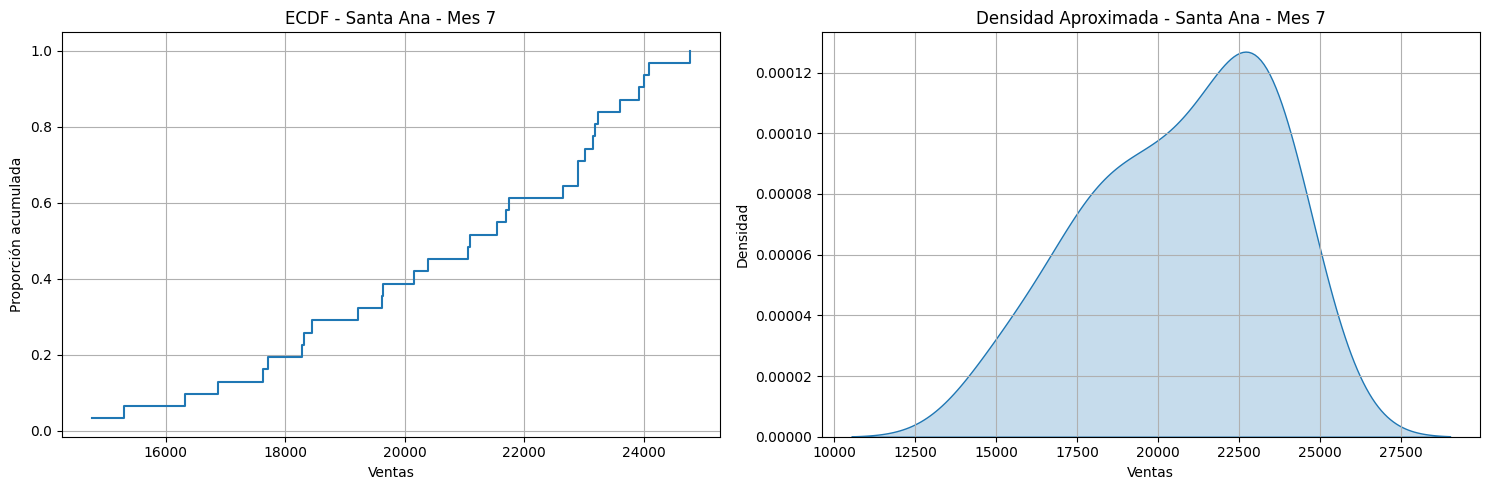

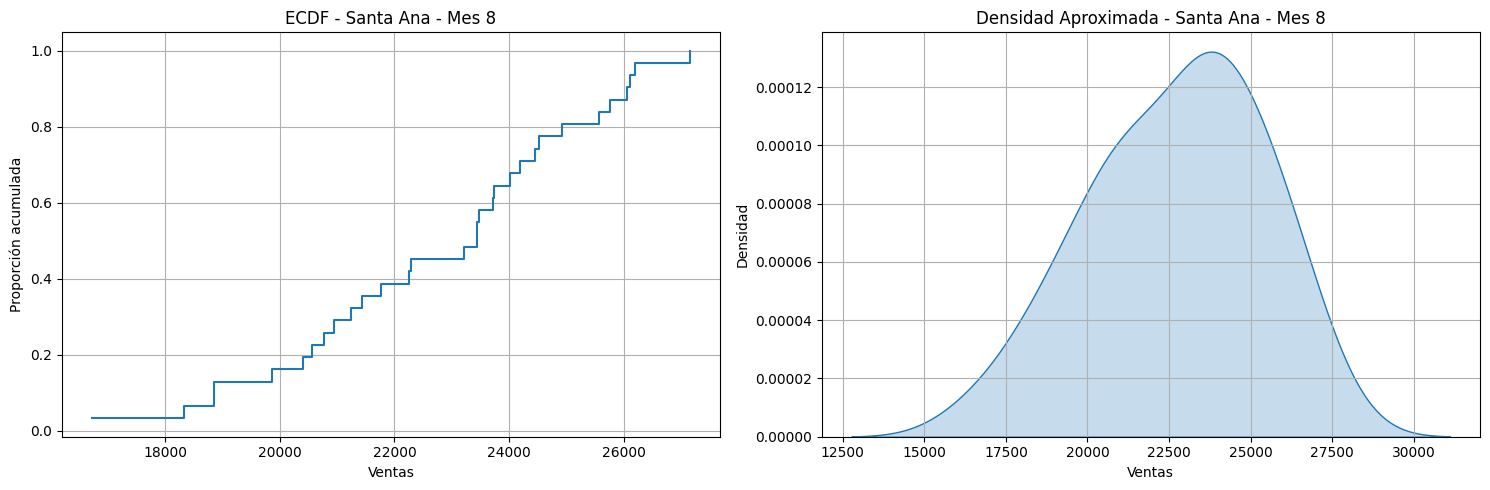

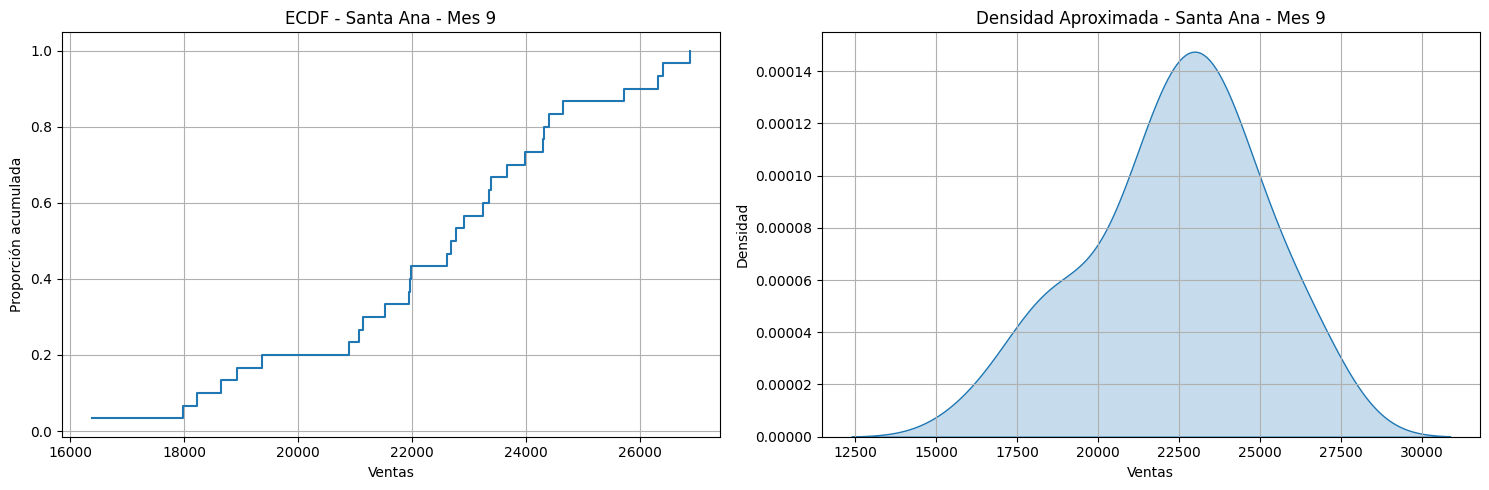

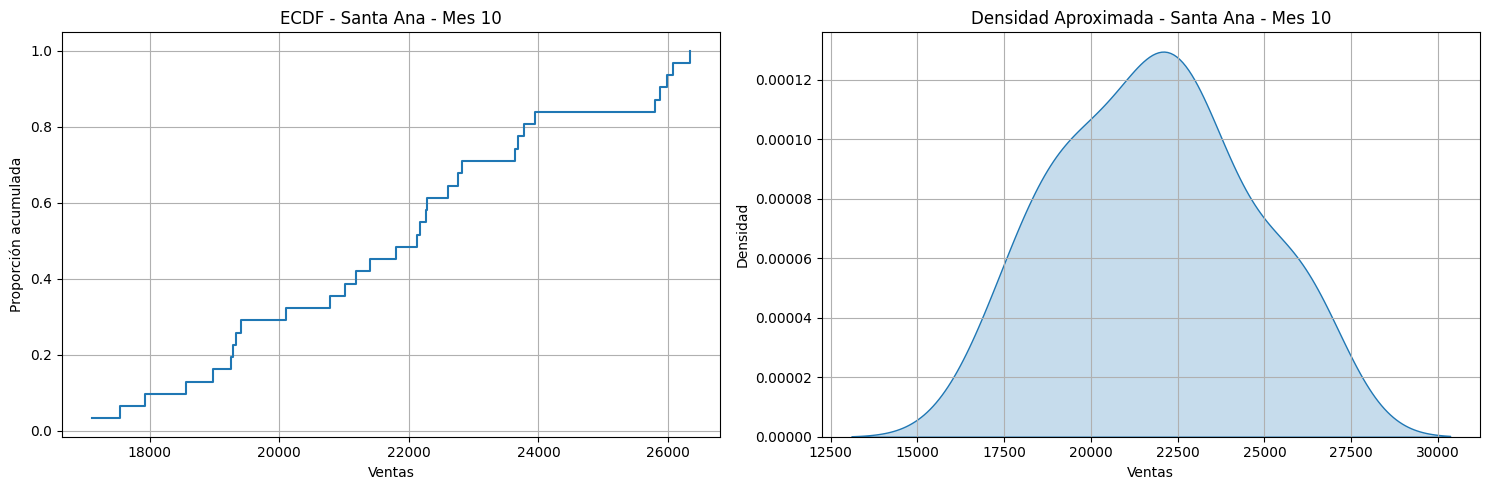

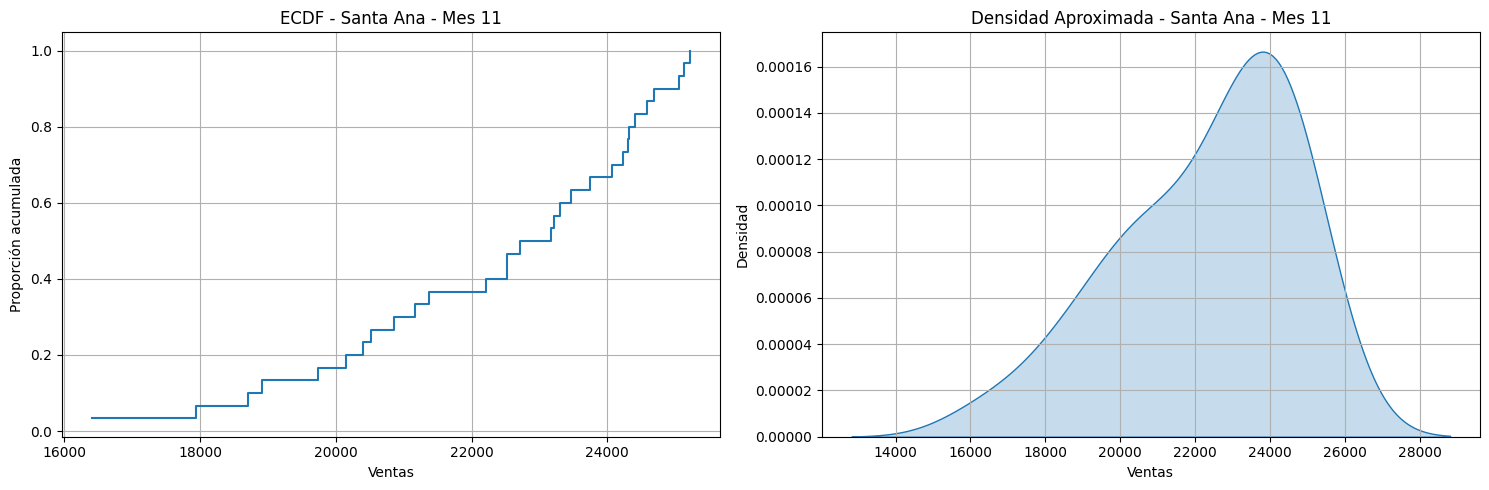

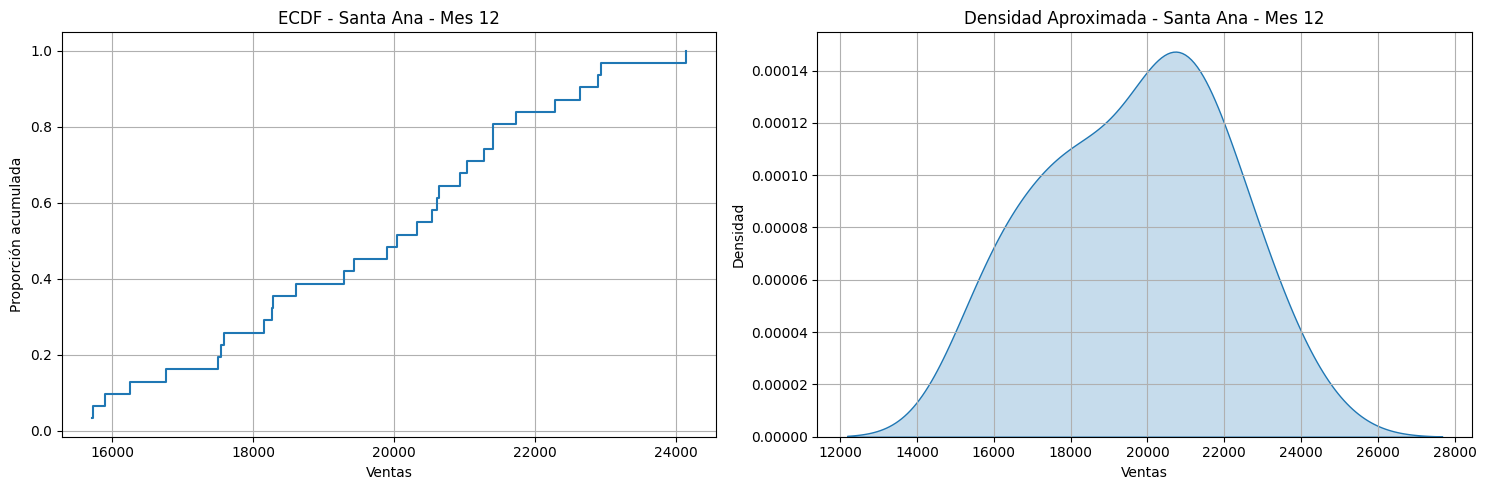

In [ ]:
meses_santa = sorted(santa_ana_df['Mes'].unique())

for mes in meses_santa:
    datos = santa_ana_df[santa_ana_df['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    
    # ECDF
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.step(x, y, where='post')
    plt.title(f'ECDF - Santa Ana - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Proporción acumulada')
    plt.grid(True)
    
    # Aproximacion de Densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(datos, fill=True)
    plt.title(f'Densidad Aproximada - Santa Ana - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Densidad')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [39]:
for mes in meses_santa:
    datos = santa_ana_df[santa_ana_df['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)    

    # Intervalos de Confianza Empíricos
    n = len(datos)
    datos_ordenados = np.sort(datos)
    
    # 95%
    lower_95 = datos_ordenados[int(0.025 * n)]
    upper_95 = datos_ordenados[int(0.975 * n) - 1]
    
    # 99%
    lower_99 = datos_ordenados[int(0.005 * n)]
    upper_99 = datos_ordenados[int(0.995 * n) - 1]
    
    print(f"ICE (95%) para Santa Ana mes {mes}: [{lower_95}, {upper_95}]")
    print(f"ICE (99%) para Santa Ana mes {mes}: [{lower_99}, {upper_99}]")

ICE (95%) para Santa Ana mes 1: [13523.024414952464, 21332.58394025307]
ICE (99%) para Santa Ana mes 1: [13523.024414952464, 21332.58394025307]
ICE (95%) para Santa Ana mes 2: [14317.640647559021, 22794.375101485082]
ICE (99%) para Santa Ana mes 2: [14317.640647559021, 22794.375101485082]
ICE (95%) para Santa Ana mes 3: [16535.615507133327, 26007.583284304004]
ICE (99%) para Santa Ana mes 3: [16535.615507133327, 26007.583284304004]
ICE (95%) para Santa Ana mes 4: [14974.856020232903, 23521.345164446175]
ICE (99%) para Santa Ana mes 4: [14974.856020232903, 23521.345164446175]
ICE (95%) para Santa Ana mes 5: [16031.58021370601, 25576.609471125455]
ICE (99%) para Santa Ana mes 5: [16031.58021370601, 25576.609471125455]
ICE (95%) para Santa Ana mes 6: [17340.830879136316, 25801.13256312043]
ICE (99%) para Santa Ana mes 6: [17340.830879136316, 25801.13256312043]
ICE (95%) para Santa Ana mes 7: [14764.364355700185, 24089.031490955666]
ICE (99%) para Santa Ana mes 7: [14764.364355700185, 2408

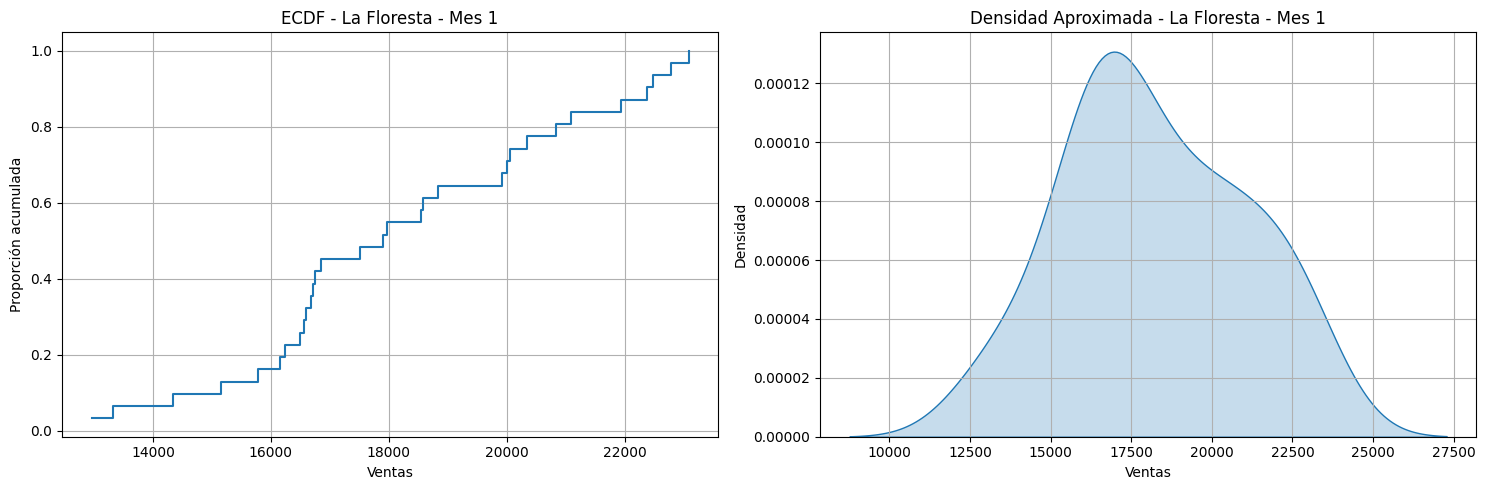

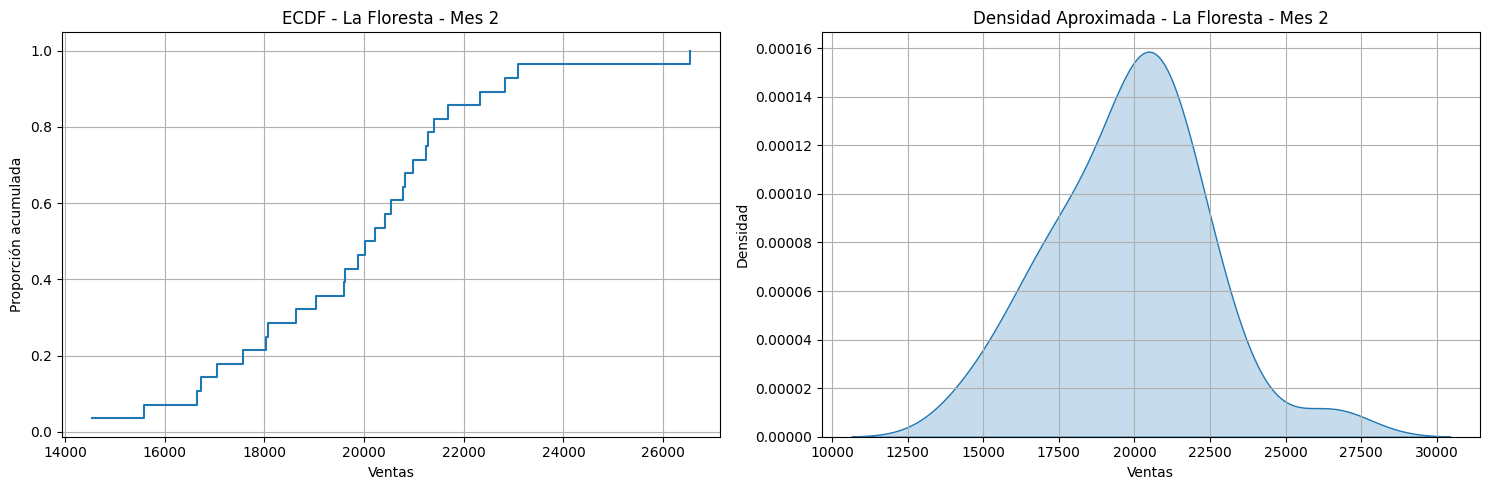

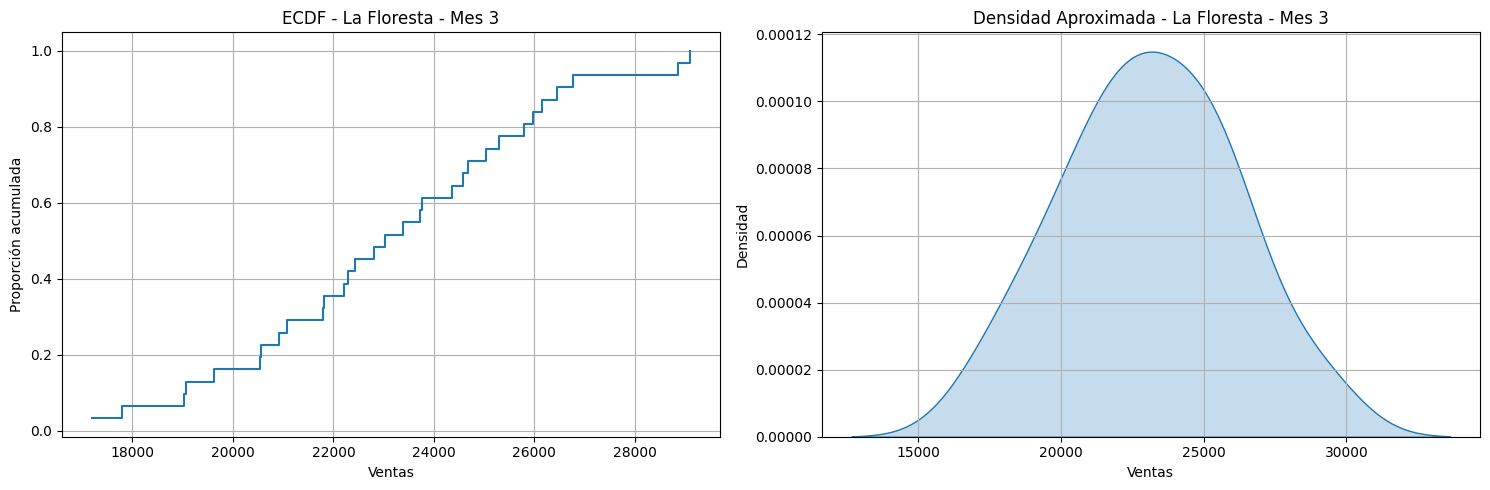

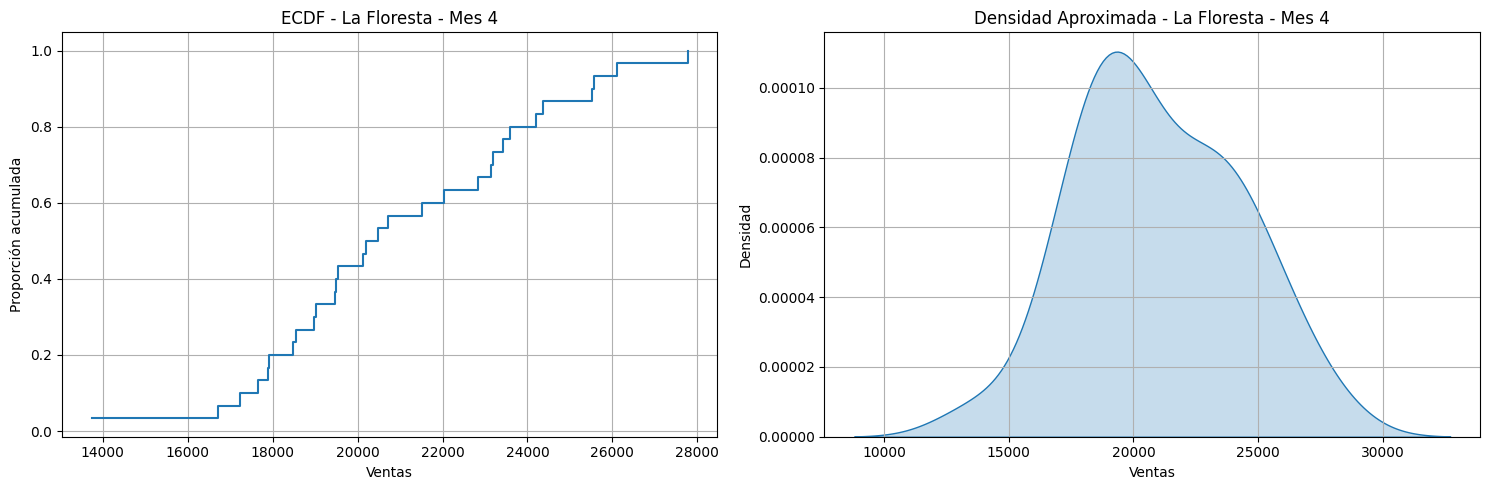

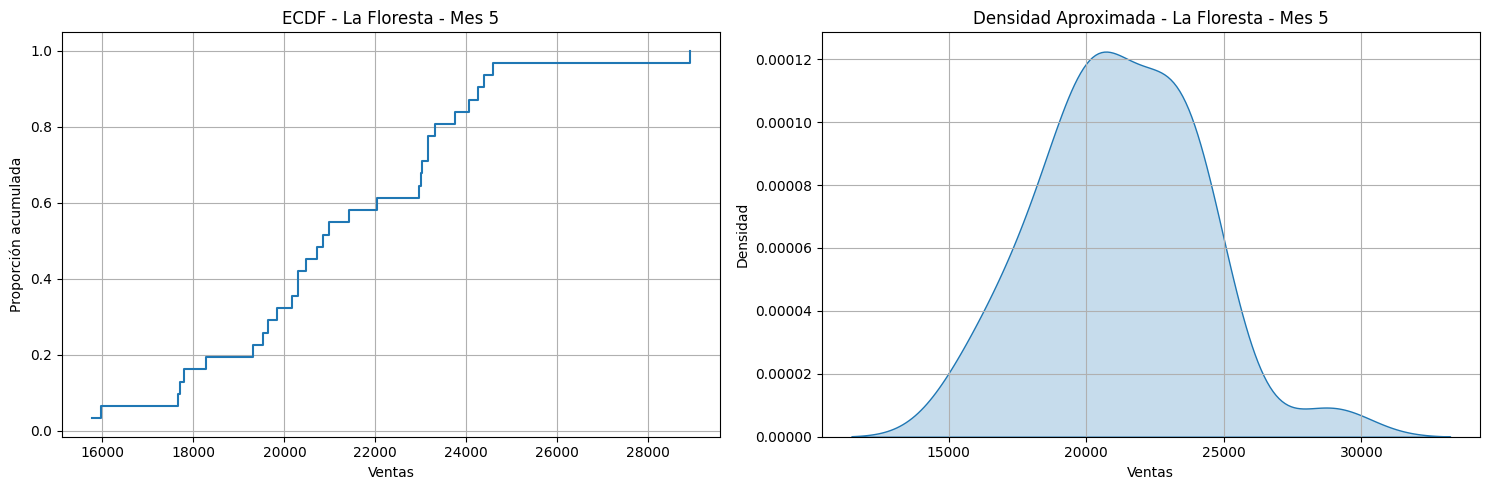

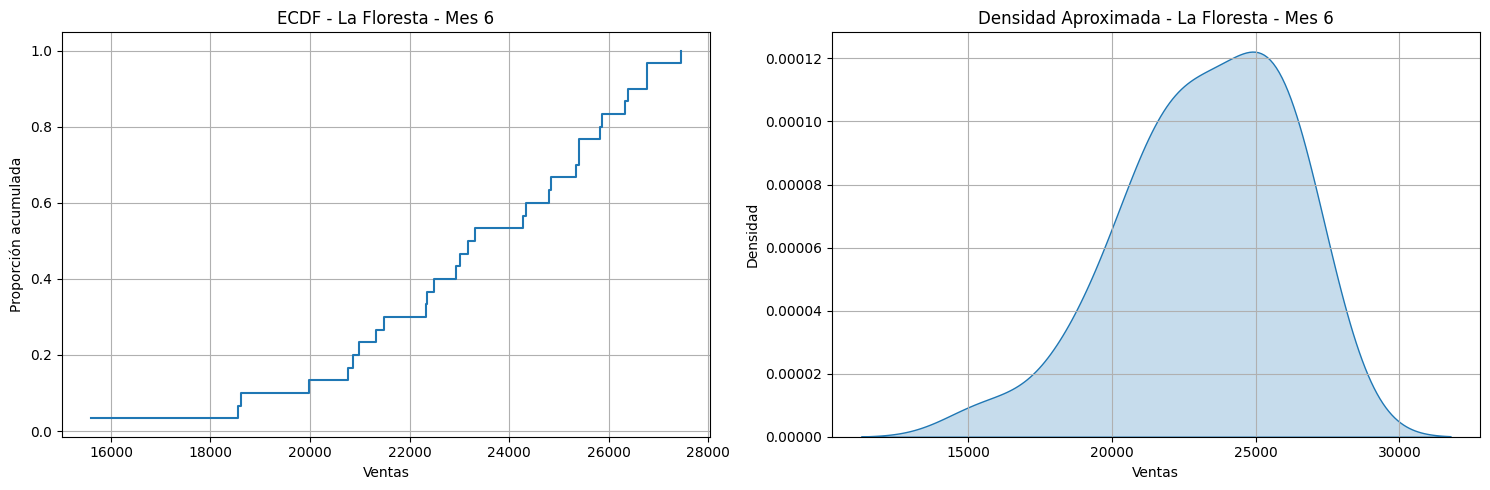

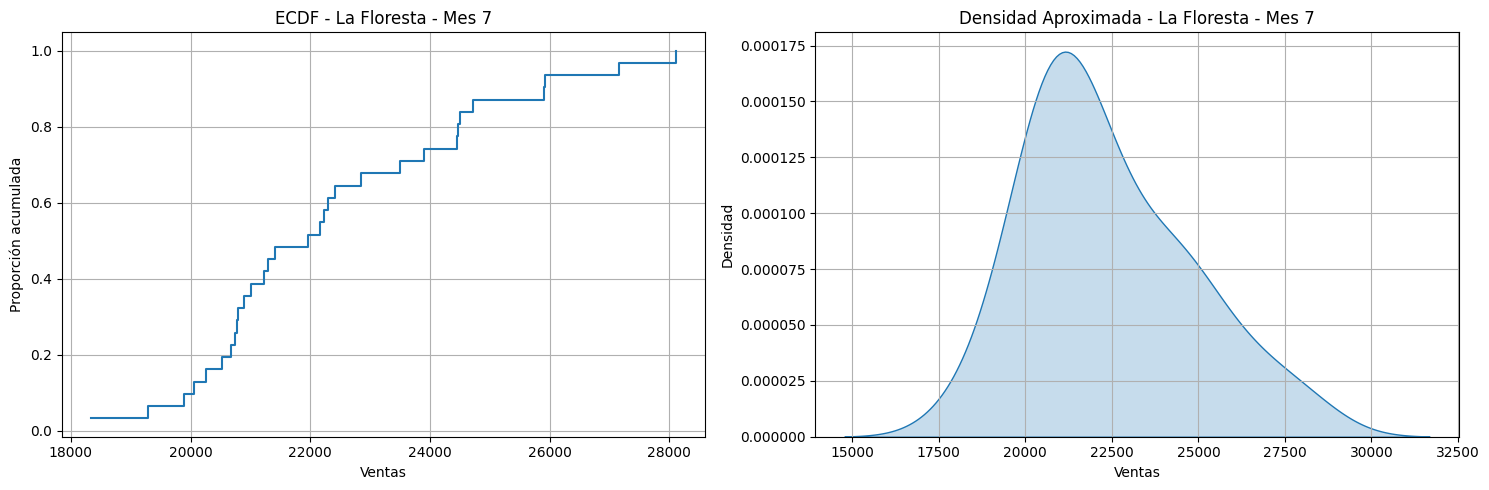

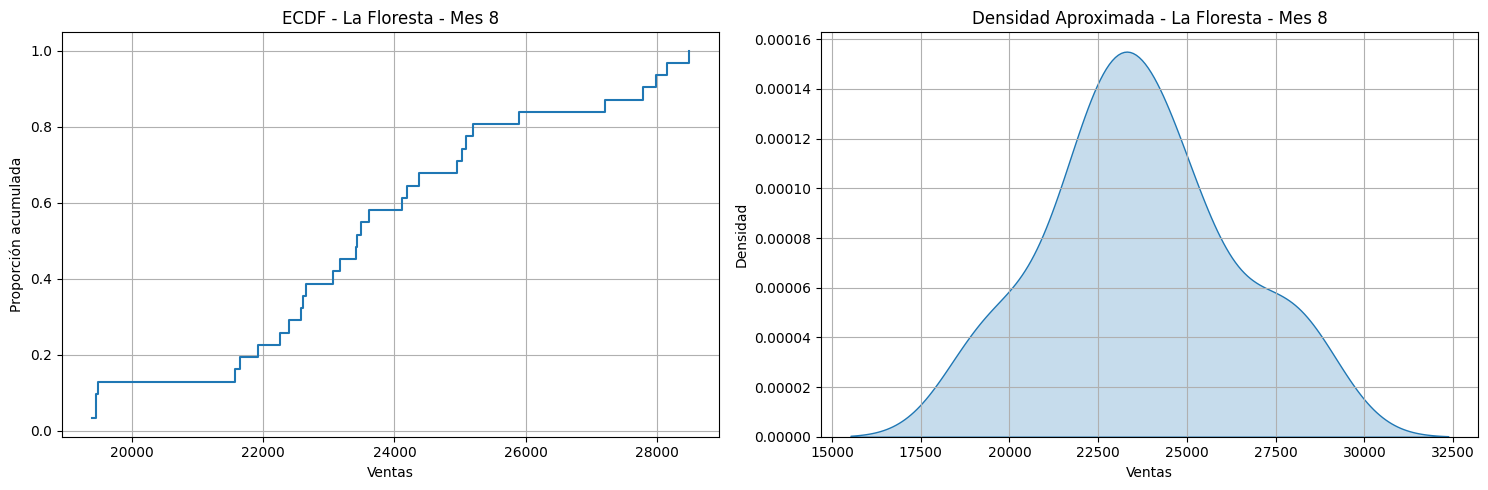

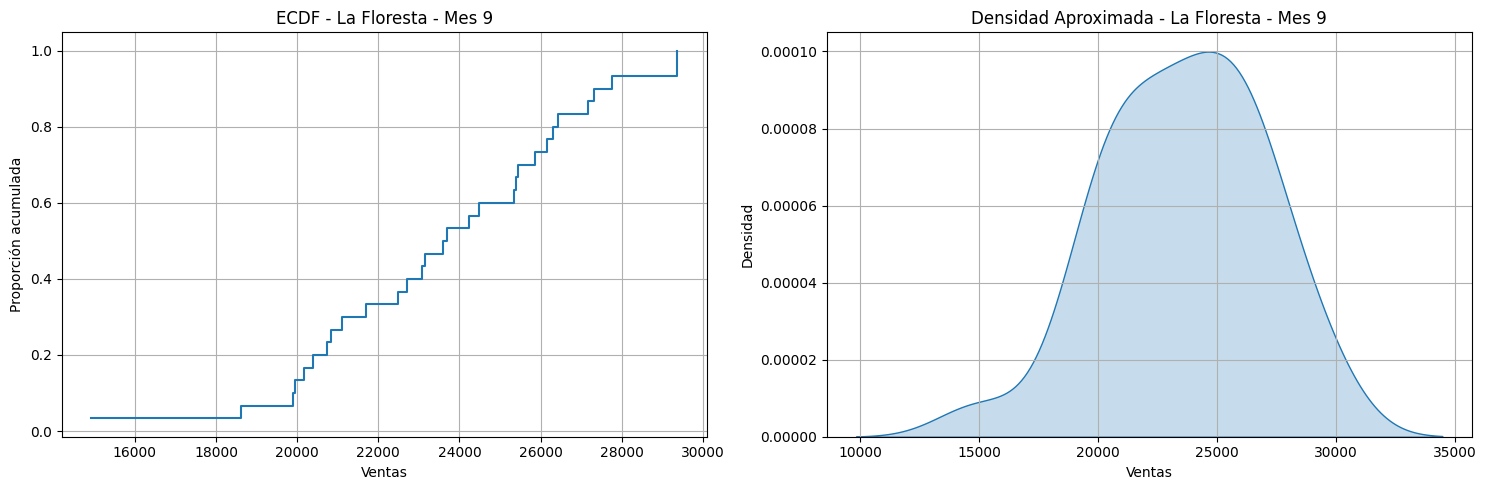

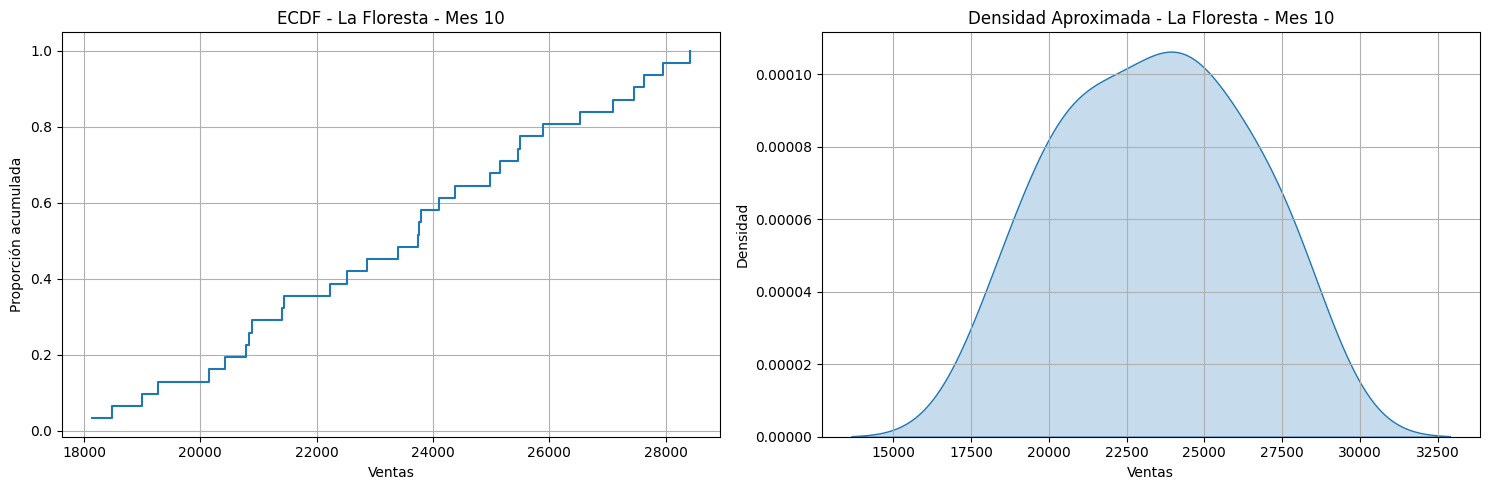

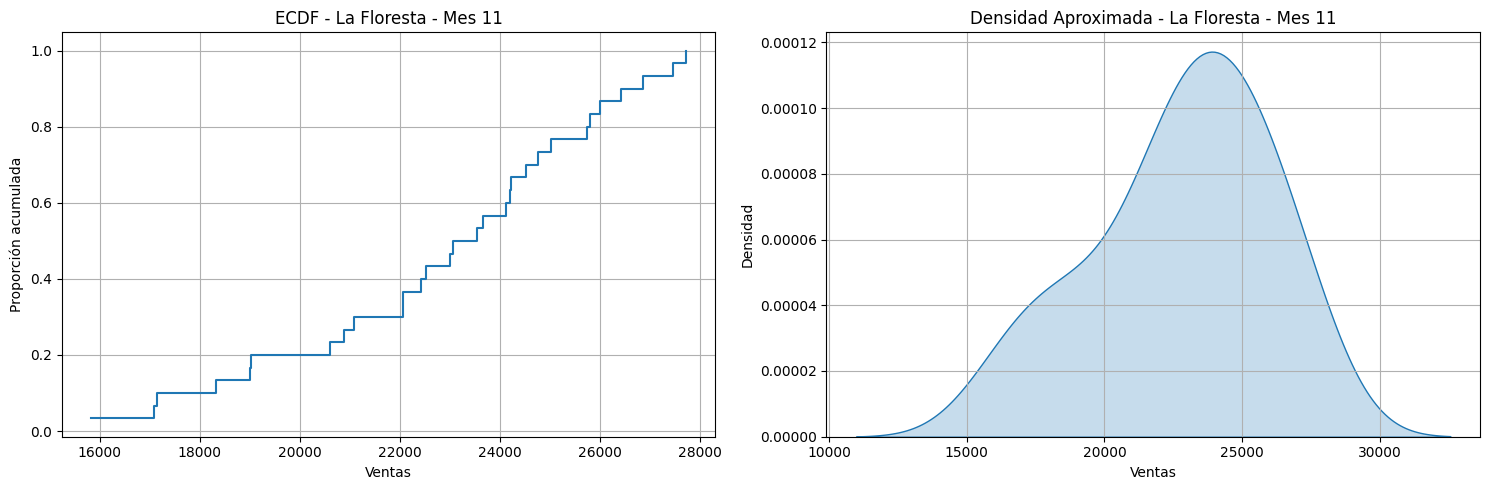

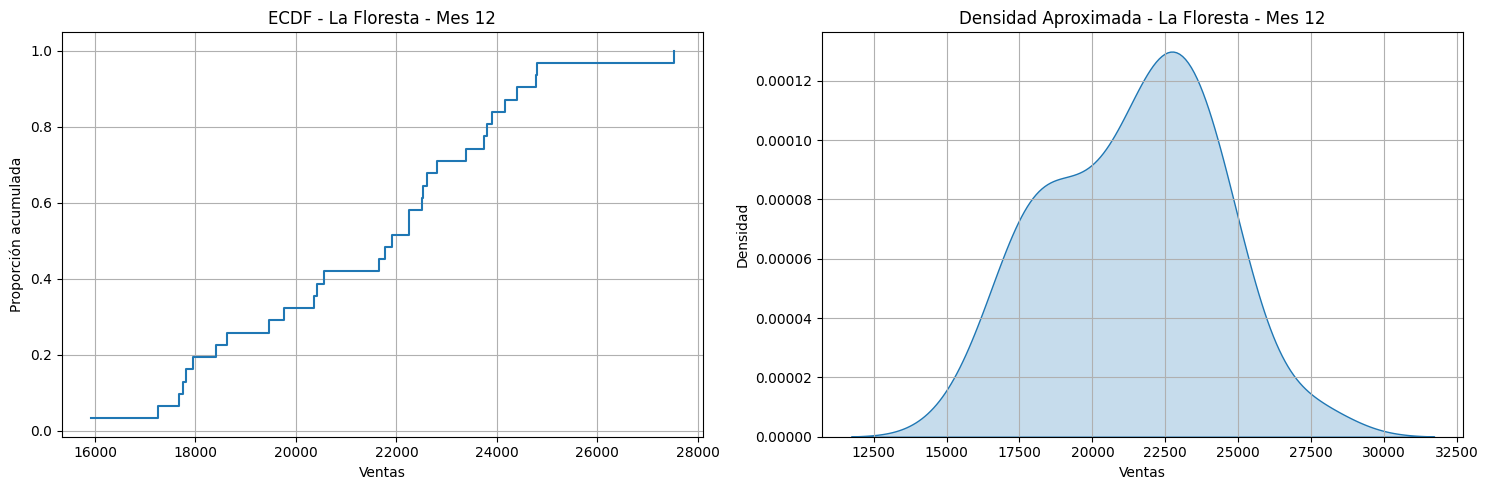

In [28]:
meses_floresta = sorted(la_floresta_df['Mes'].unique())

for mes in meses_floresta:
    datos = la_floresta_df[la_floresta_df['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    
    # ECDF
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.step(x, y, where='post')
    plt.title(f'ECDF - La Floresta - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Proporción acumulada')
    plt.grid(True)
    
    # Aproximación de Densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(datos, fill=True)
    plt.title(f'Densidad Aproximada - La Floresta - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Densidad')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [37]:
for mes in meses_floresta:
    datos = la_floresta_df[la_floresta_df['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)

    # Intervalos de Confianza Empíricos
    n = len(datos)
    datos_ordenados = np.sort(datos)
        
    # 95%
    lower_95 = datos_ordenados[int(0.025 * n)]
    upper_95 = datos_ordenados[int(0.975 * n) - 1]
        
    # 99%
    lower_99 = datos_ordenados[int(0.005 * n)]
    upper_99 = datos_ordenados[int(0.995 * n) - 1]
        
    print(f"ICE (95%) para La Floresta mes {mes}: [{lower_95}, {upper_95}]")
    print(f"ICE (99%) para La Floresta mes {mes}: [{lower_99}, {upper_99}]")

ICE (95%) para La Floresta mes 1: [12960.259037108786, 22783.95224471714]
ICE (99%) para La Floresta mes 1: [12960.259037108786, 22783.95224471714]
ICE (95%) para La Floresta mes 2: [14537.73473555478, 23081.455240042138]
ICE (99%) para La Floresta mes 2: [14537.73473555478, 23081.455240042138]
ICE (95%) para La Floresta mes 3: [17188.40678336658, 28853.738309787255]
ICE (99%) para La Floresta mes 3: [17188.40678336658, 28853.738309787255]
ICE (95%) para La Floresta mes 4: [13734.357073348072, 26117.03692316882]
ICE (99%) para La Floresta mes 4: [13734.357073348072, 26117.03692316882]
ICE (95%) para La Floresta mes 5: [15764.57159314343, 24588.288195173973]
ICE (99%) para La Floresta mes 5: [15764.57159314343, 24588.288195173973]
ICE (95%) para La Floresta mes 6: [15603.586195838552, 26771.04037200627]
ICE (99%) para La Floresta mes 6: [15603.586195838552, 26771.04037200627]
ICE (95%) para La Floresta mes 7: [18337.21303062907, 27160.260882816532]
ICE (99%) para La Floresta mes 7: [183

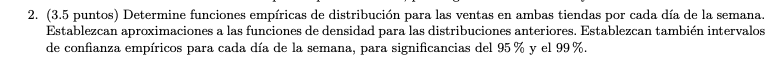

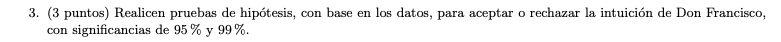

### Link al Notebook
Se puede encontrar el trabajo completo en el siguiente link: [Repositorio GitHub](https://github.com/abrilnoguera/TPFinal-PEIA)